In [1]:
import sys
from os import path
sys.path.append("..")

from svm.svm_custom import SVM
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

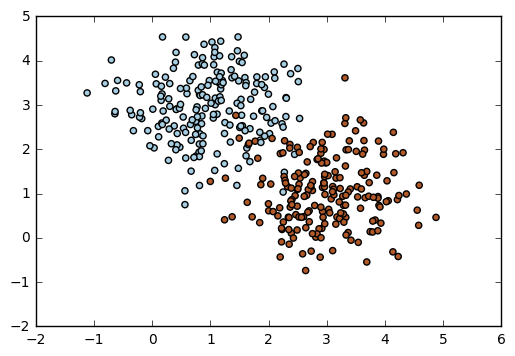

In [2]:
from svm.svm_custom import SVM_SGD

X, y = datasets.make_blobs(n_samples=400, centers=[[1, 3], [3, 1]], cluster_std=[0.75, 0.75])
y[y == 0] = -1

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.show()

In [3]:
mysgd = SVM_SGD(eta0=0.2)
num = 400
mysgd.fit(X[0:num], y[0:num], batch_size=2)

mysgd.score(X, y)

0.96999999999999997

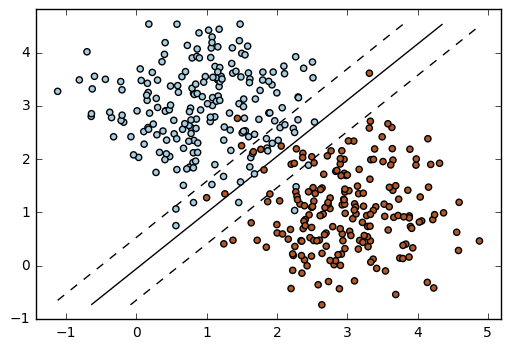

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Determine decision boundry
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
#XX, YY = np.mgrid[-10:10:200j, -10:10:200j]
b_test = list(np.c_[XX.ravel(), YY.ravel()])
Z = mysgd.decision_function(b_test)

# Put the result into a color plot
Z = np.asarray(Z)
Z = Z.reshape(XX.shape)
#plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])
plt.show()

In [5]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import PolynomialFeatures

def x_to_poly(x, degree=2):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(x)

def x_to_rbf(x, gamma=1.0, n=100):
    rbf_feature = RBFSampler(gamma=gamma, n_components=n, random_state=1)
    return rbf_feature.fit_transform(x)

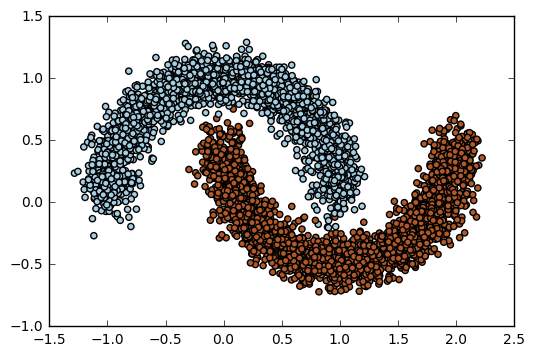

In [6]:
X, y = datasets.make_moons(n_samples=5000, noise=0.1)
y[y == 0] = -1

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.show()

X_tran = x_to_rbf(X, n=50, gamma=1.0)

In [7]:
mysgd = SVM_SGD(eta0=1)
num = 500
mysgd.fit(X_tran[0:num], y[0:num], batch_size=1)

mysgd.score(X_tran, y)

0.99160000000000004

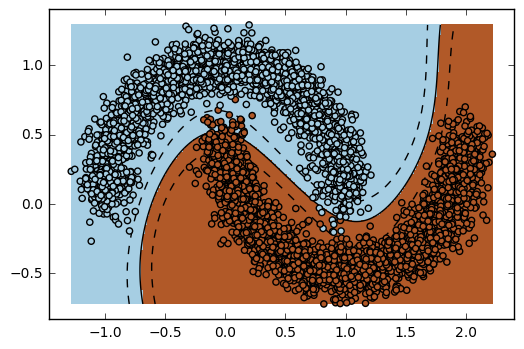

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Determine decision boundry
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
#XX, YY = np.mgrid[-10:10:200j, -10:10:200j]
b_test = np.c_[XX.ravel(), YY.ravel()]

b_tran = x_to_rbf(b_test, gamma=1, n=50)

Z = mysgd.decision_function(b_tran)

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])
plt.show()

In [9]:
mysgd_test = SVM_SGD(eta0=0.5, alpha=0.015)
num_train = 2000
X_train = X_tran[:num_train]
y_train = y[:num_train]
X_test = X_tran[num_train:]
y_test = y[num_train:]

scores, lrates = mysgd_test.fit_batch_score(X_train, y_train, X_test, y_test, batch_size=2)

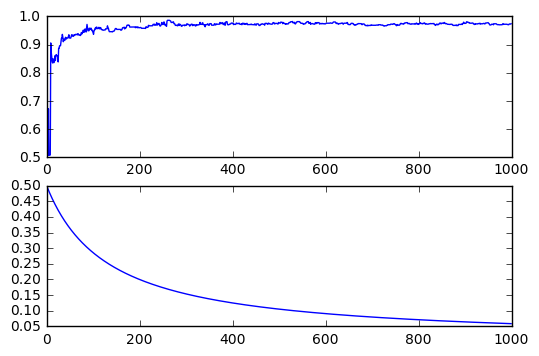

In [10]:
plt.subplot(2, 1, 1)
plt.plot(scores)

plt.subplot(2, 1, 2)
plt.plot(lrates)
plt.show()

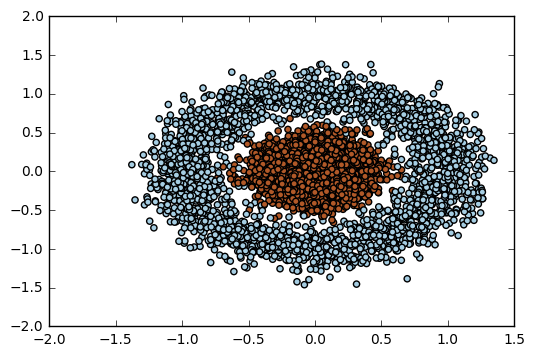

In [11]:
X, y = datasets.make_circles(n_samples=5000, factor=0.25, noise=0.15)
y[y == 0] = -1

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.show()

X_tran = x_to_rbf(X, n=100, gamma=1.0)

In [12]:
num_train = 3000
X_train = X_tran[:num_train]
y_train = y[:num_train]
X_test = X_tran[num_train:]
y_test = y[num_train:]

sgd_circle = SVM_SGD(eta0=0.5, alpha=0.02)
scores, lrates = sgd_circle.fit_batch_score(X_train, y_train, X_test, y_test, batch_size=2)

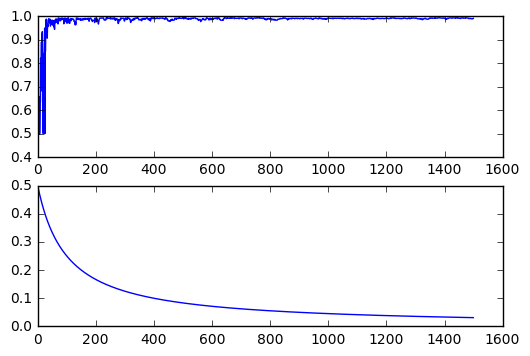

In [13]:
plt.subplot(2, 1, 1)
plt.plot(scores)

plt.subplot(2, 1, 2)
plt.plot(lrates)
plt.show()

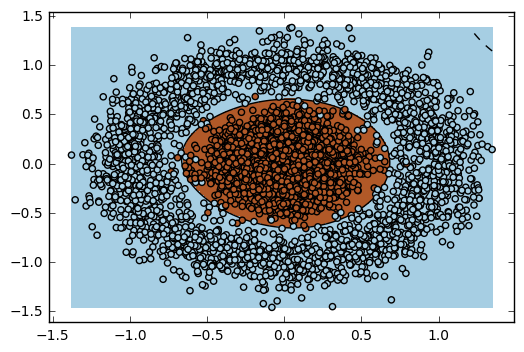

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Determine decision boundry
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
#XX, YY = np.mgrid[-5:5:200j, -5:5:200j]
b_test = np.c_[XX.ravel(), YY.ravel()]

b_tran = x_to_rbf(b_test, n=100, gamma=1.0)

Z = sgd_circle.decision_function(b_tran)

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])
plt.show()